<a href="https://colab.research.google.com/github/Claudia-Salas/python/blob/main/2023_11_06_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Networkx
========

**Date:** 2023-11-06



## La biblioteca networkx



La biblioteca `networkx` sirve para trabajar en Python con gráficas (también llamadas *redes*).

Una gráfica es una pareja formada por un conjunto de vértices (también llamados *nodos*) y un conjunto de aristas. Cada arista es un  conjunto de dos vértices. Las gráficas se suelen representar con un dibujo donde los vértices se representan con puntos y las aristas como líneas que unen los respectivos puntos.



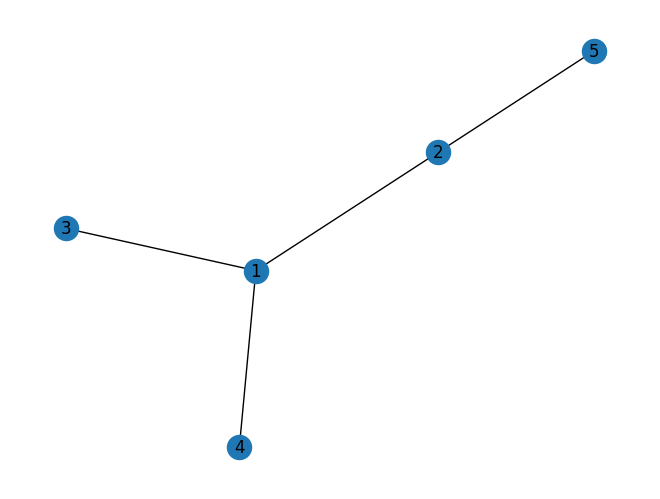

In [9]:
import networkx as nx

g = nx.Graph()
g.add_edges_from([(1, 2), (1, 3),(1,4),(2,5)])
# nx.draw(g)
nx.draw(g, with_labels=True)

como edges son las lineas estamos haciendo lineas que salen de 1 a 2,3 y 4
agregamos otra linea que sale de 2 hasta 5

También se pueden añadir los vértices al principio, y después las aristas.



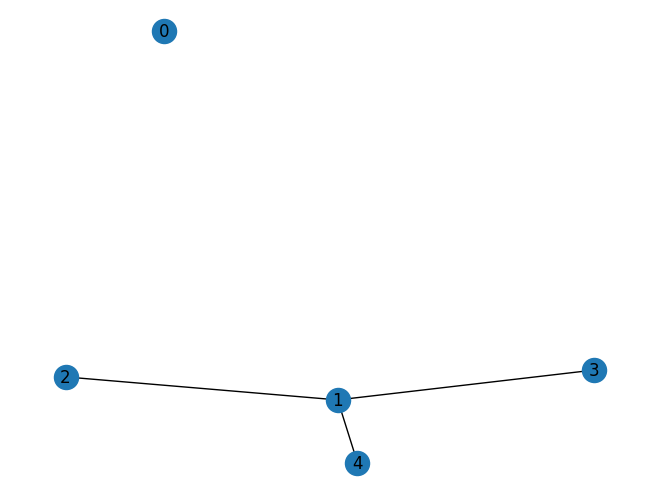

In [7]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(range(5))
g.add_edges_from([(1, 2), (1, 3),(1,4)])
nx.draw(g, with_labels=True)

nodes son los puntitos azules
y edges son las lineas

En una gráfica de `networkx`, un vértice puede ser cualquier objeto que sea *hashable*. El *hash* de un objeto es una clave numérica que identifica a un objeto, y se calcula con la función `hash`. Si una clase produce objetos mutables (como las clase de las listas), ninguna instancia de esa clase es hashable. Pero por ejemplo, una tupla que conste solo de objetos inmutables es hashable.



In [10]:
hash(4), hash("hola"), hash((4, "hola"))

(4, 356640354974921628, -3638820820674160407)

In [11]:
hash([2, 3])

TypeError: ignored

In [12]:
hash((2, [1, 2]))

TypeError: ignored

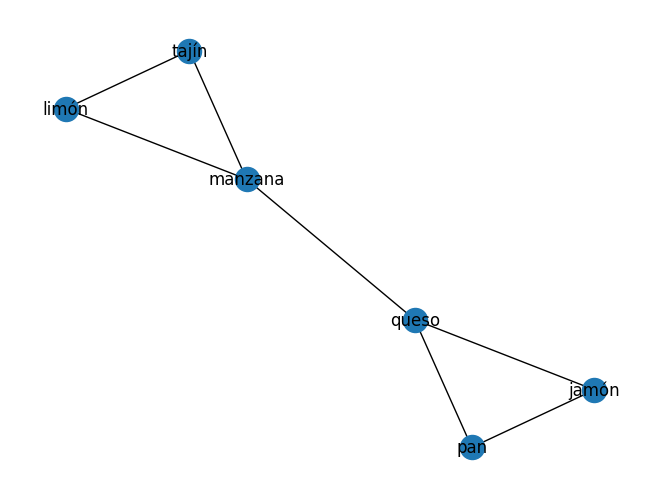

In [17]:
g = nx.Graph()
g.add_nodes_from(["limón", "manzana", "pan", "queso","tajín","jamón"])
g.add_edges_from([("limón", "manzana"), ("pan", "queso"), ("manzana", "queso"),("limón","tajín"),("manzana","tajín"),("pan","jamón"),("queso","jamón")])
nx.draw(g, with_labels=True)

hacer pareja de los alimentos que se pueden combinar

## Problema



A una actriz a la que le han ofrecido los siguientes proyectos para el siguiente año. Suponiendo que no puede trabajar en dos películas al mismo tiempo, y que recibe un salario de un millón de dólares por película, ¿qué películas debe escoger para maximizar su ingreso?


| Título|Inicio|Final|
|---|---|---|
| Star Wars 9|Enero 15|Febrero 2|
| Toy Story 5|Enero 28|Febrero 3|
| Anabelle 3|Marzo 2|Marzo 5|
| Planeta de los Simios 4|Febrero 17|Marzo 3|
| Titanic 2|Febrero 4|Febrero 25|
| Harry Potter 9|Febrero 16|Marzo 17|
| Saw 9|Marzo 10|Marzo 15|
| A Beautiful Mind 2|Marzo 4|Marzo 12|
| Ant Man 3|Enero 19|Enero 30|
| Ocean's Fourteen|Febrero 26|Marzo 6|
| Batman vs. Aquaman|Febrero 10|Febrero 19|
| No se aceptan devoluciones 2|Febrero 27|Marzo 8|



### Solución



Vamos a definir una clase llamada `Película` para guardar los datos de una película. También definiremos métodos para determinar si una película se puede grabar al mismo tiempo que otra (en ese caso diremos que las películas son compatibles). Para trabajar con fechas, en Python existe la biblioteca estándar `datetime` y su función `date`. Entonces `date(2023, 3, 4)` codifica el 4 de marzo (tercer mes) del 2023.



In [18]:
from datetime import date

date(2023, 3, 4) < date(2023, 4, 3)

True

decir que una fecha esta antes que la otra, como ejemplo el 4 de marzo del 2023 esta antes que el 3 de abril del 2023

In [19]:
(date(2023, 4, 3) - date(2023, 3, 4)).days

30

nos dice cuantos dias hay entre esas fechas

In [25]:
(date(2023, 11, 8) - date(2002, 9,20)).days

7719

In [56]:
class Película:
    def __init__(self,
                 t = "Título",
                 i = date(2023, 1, 1),
                 f = date(2023, 12, 31)):
        self.titulo = t
        self.inicio = i
        self.final = f
    def duracion(self):
        return (self.final-self.inicio).days
    def es_compatible(self, otra):
        if self.inicio < otra.inicio:
            primera, segunda = self, otra
        else:
            primera, segunda = otra, self
        return primera.final < segunda.inicio
    def __repr__(self):
        return self.titulo

st9 = Película("Star Wars 9", date(2024, 1, 15), date(2024, 2, 2))
ts5 = Película("Toy Story 5", date(2024, 1, 28), date(2024, 2, 3))

st9.inicio, st9.duracion(), st9.es_compatible(ts5), st9

(datetime.date(2024, 1, 15), 18, False, Star Wars 9)

atributo es una constante
el repr es para que la grafica se vea mas bonita

Vamos a formar una gráfica donde los vértices corresponden a las películas, y se declaran dos vértices adyacentes cuando las correspondientes películas son compatibles.



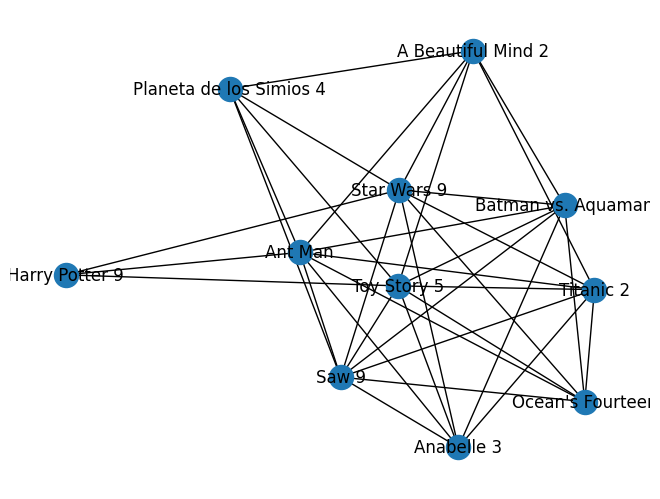

In [29]:
st9 = Película("Star Wars 9", date(2024, 1, 15), date(2024, 2, 2))
ts5 = Película("Toy Story 5", date(2024, 1, 28), date(2024, 2, 3))
a3 = Película("Anabelle 3", date(2024, 3, 2), date(2024, 3, 5))
ps4 = Película("Planeta de los Simios 4", date(2024, 2, 17), date(2024, 3, 3))
t2 = Película("Titanic 2", date(2024, 2, 4), date(2024, 2, 25))
hp9 = Película("Harry Potter 9", date(2024, 2, 16), date(2024, 3, 17))
s9 = Película("Saw 9", date(2024, 3, 10), date(2024, 3, 15))
abm2 = Película("A Beautiful Mind 2", date(2024, 3, 4), date(2024, 3, 12))
am3 = Película("Ant Man", date(2024, 1, 19), date(2024, 1, 30))
o14 = Película("Ocean's Fourteen", date(2024, 2, 26), date(2024, 3, 6))
bva = Película("Batman vs. Aquaman", date(2024, 2, 10), date(2024, 2, 19))
nd2 = Película("No se aceptan devoluciones 2", date(2024, 2, 27), date(2024, 3, 8))

peliculas = [st9, ts5, a3, ps4, t2, hp9, s9, abm2, am3, o14, bva]

aristas = []

for i in range(len(peliculas)):
    for j in range(i+1, len(peliculas)):
      ###el i+1 es para solo poner una vez las peliculas que son compatibles y que no se pongan 2 veces
        if peliculas[i].es_compatible(peliculas[j]):
            aristas.append((peliculas[i], peliculas[j]))

G = nx.Graph()
G.add_nodes_from(peliculas)
G.add_edges_from(aristas)
nx.draw(G, with_labels=True)

un conjunto de vertices, que entre todos son adyacentes (todos los que se puedan), se le llama un clan

La función `draw` de networkx tiene un argumento opcional `ax` para especificar el Axes donde queremos dibujar una gráfica.



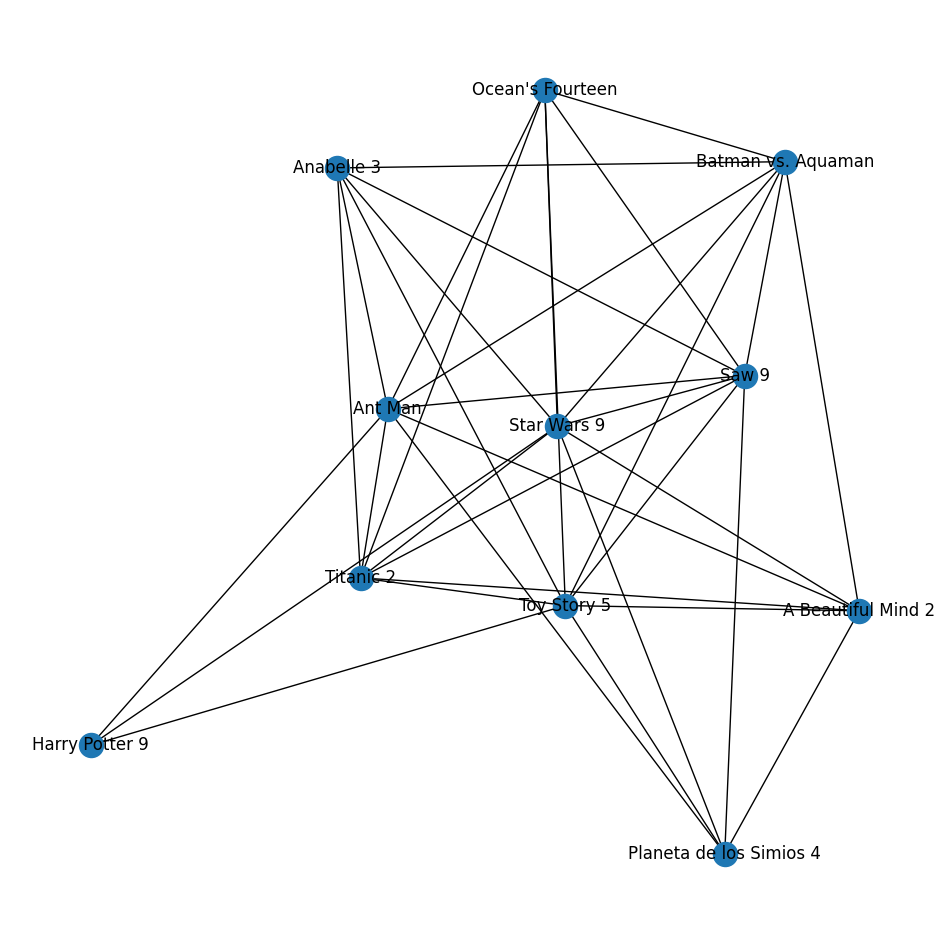

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 12))
nx.draw(G, with_labels=True, ax=ax1)

Un conjunto $c$ de vértices donde cualquier par de vértices de $c$ son adyacente se llama una *completa*. Una completa maximal (es decir, a la que no se le pueden añadir vértices y seguir formando completa) se llama un *clan*. En `networkx`, la lista de los clanes se puede encontrar con la función `find_cliques`.

Observemos que `nx.find_cliques` regresa un *generador*. El concepto de generador lo veremos más adelante en detalle.



In [31]:
clanes = nx.find_cliques(G)
clanes

<generator object find_cliques at 0x7a20ccdc3530>

In [32]:
list(clanes)

[[A Beautiful Mind 2, Batman vs. Aquaman, Ant Man],
 [A Beautiful Mind 2, Batman vs. Aquaman, Toy Story 5],
 [A Beautiful Mind 2, Batman vs. Aquaman, Star Wars 9],
 [A Beautiful Mind 2, Planeta de los Simios 4, Ant Man],
 [A Beautiful Mind 2, Planeta de los Simios 4, Toy Story 5],
 [A Beautiful Mind 2, Planeta de los Simios 4, Star Wars 9],
 [A Beautiful Mind 2, Titanic 2, Ant Man],
 [A Beautiful Mind 2, Titanic 2, Toy Story 5],
 [A Beautiful Mind 2, Titanic 2, Star Wars 9],
 [Harry Potter 9, Ant Man],
 [Harry Potter 9, Toy Story 5],
 [Harry Potter 9, Star Wars 9],
 [Saw 9, Batman vs. Aquaman, Anabelle 3, Ant Man],
 [Saw 9, Batman vs. Aquaman, Anabelle 3, Toy Story 5],
 [Saw 9, Batman vs. Aquaman, Anabelle 3, Star Wars 9],
 [Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Ant Man],
 [Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Toy Story 5],
 [Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Star Wars 9],
 [Saw 9, Planeta de los Simios 4, Ant Man],
 [Saw 9, Planeta de los Simios 4, Toy Story 

In [33]:
list(clanes)

[]

In [41]:
clanes = nx.find_cliques(G)
[(q, len(q)) for q in clanes]

[([A Beautiful Mind 2, Batman vs. Aquaman, Ant Man], 3),
 ([A Beautiful Mind 2, Batman vs. Aquaman, Toy Story 5], 3),
 ([A Beautiful Mind 2, Batman vs. Aquaman, Star Wars 9], 3),
 ([A Beautiful Mind 2, Planeta de los Simios 4, Ant Man], 3),
 ([A Beautiful Mind 2, Planeta de los Simios 4, Toy Story 5], 3),
 ([A Beautiful Mind 2, Planeta de los Simios 4, Star Wars 9], 3),
 ([A Beautiful Mind 2, Titanic 2, Ant Man], 3),
 ([A Beautiful Mind 2, Titanic 2, Toy Story 5], 3),
 ([A Beautiful Mind 2, Titanic 2, Star Wars 9], 3),
 ([Harry Potter 9, Ant Man], 2),
 ([Harry Potter 9, Toy Story 5], 2),
 ([Harry Potter 9, Star Wars 9], 2),
 ([Saw 9, Batman vs. Aquaman, Anabelle 3, Ant Man], 4),
 ([Saw 9, Batman vs. Aquaman, Anabelle 3, Toy Story 5], 4),
 ([Saw 9, Batman vs. Aquaman, Anabelle 3, Star Wars 9], 4),
 ([Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Ant Man], 4),
 ([Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Toy Story 5], 4),
 ([Saw 9, Batman vs. Aquaman, Ocean's Fourteen, Star Wars 9], 4)

Nota: En el caso general, una gráfica con $n$ vértices puede tener una cantidad exponencial en $n$ de clanes. Sin embargo, la gráfica de las películas pertenece a una clase de gráficas (llamada *gráficas de intervalos*), en donde la cantidad de clanes es polinomial en $n$, y existe un algoritmo polinomial para enlistarlos todos.



### TAREA



Por medio de un programa en Python, determina cuáles de los clanes de 4 películas toma menos días en total.



In [65]:
clanes = nx.find_cliques(G)
clanes4=[q for q in clanes if len(q)==4]
#para obtener los clanes que tienes 4 peliculas

def duracion_total(peli4):
      return sum([q.duracion() for q in peli4])

[(duracion_total(q),q) for q in clanes4]
#nos saca cuantos dias dura cada clan

min([(duracion_total(q),q) for q in clanes4])
#el min es para ver que clan tiene menos dias

(23, [Saw 9, Batman vs. Aquaman, Anabelle 3, Toy Story 5])

## Colecciones de gráficas en networkx



Hay familias de gráficas y gráficas famosas que ya están definidas:



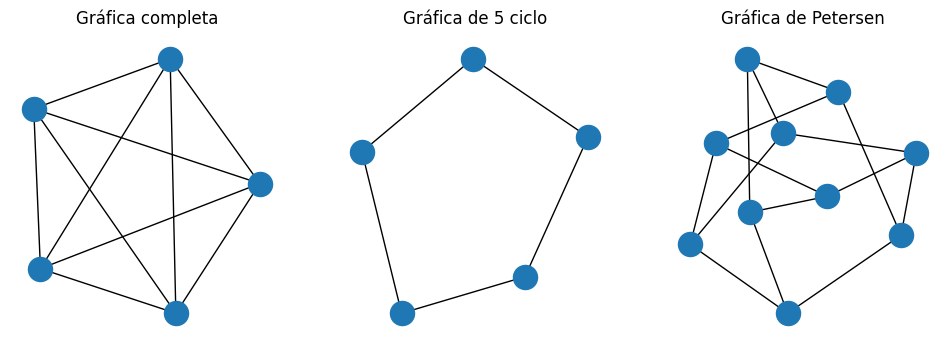

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
g1 = nx.complete_graph(5)
g2 = nx.cycle_graph(5)
g3 = nx.petersen_graph()
nx.draw(g1, ax=axs[0])
nx.draw(g2, ax=axs[1])
nx.draw(g3, ax=axs[2])
axs[0].set_title("Gráfica completa")
axs[1].set_title("Gráfica de 5 ciclo")
axs[2].set_title("Gráfica de Petersen")
plt.show()

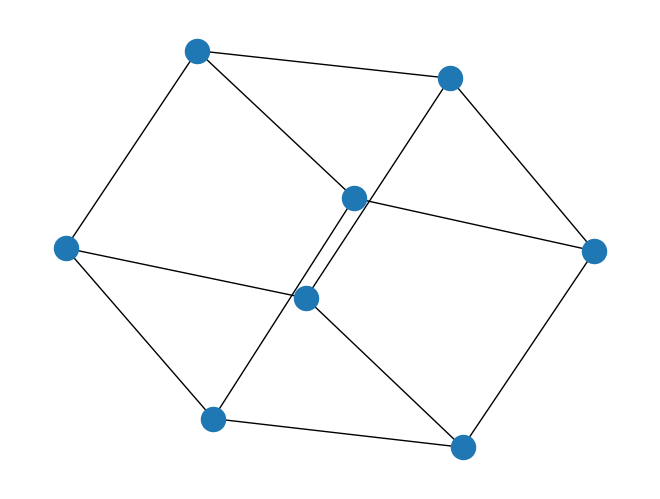

In [75]:
nx.draw(nx.cubical_graph())

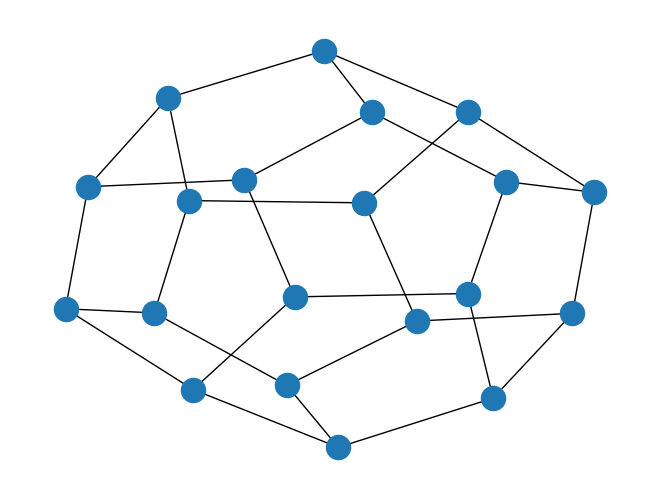

In [77]:
nx.draw(nx.dodecahedral_graph())

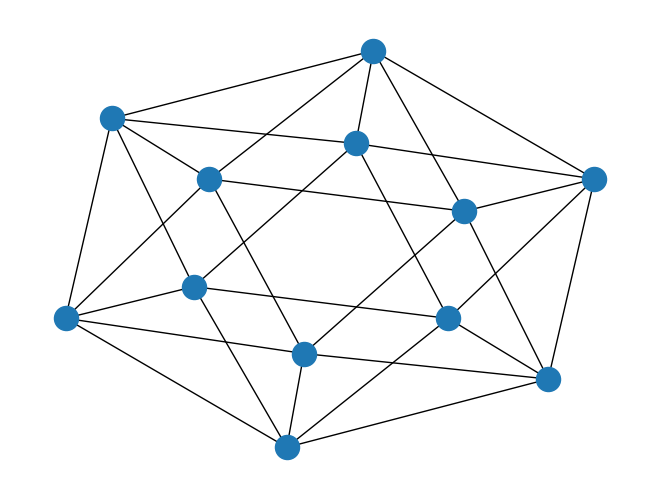

In [79]:
nx.draw(nx.icosahedral_graph())

### Gráficas aleatorias



Una gráfica aleatoria, con 10 vértices y cada arista tiene una probabilidad `0.3` de aparecer.



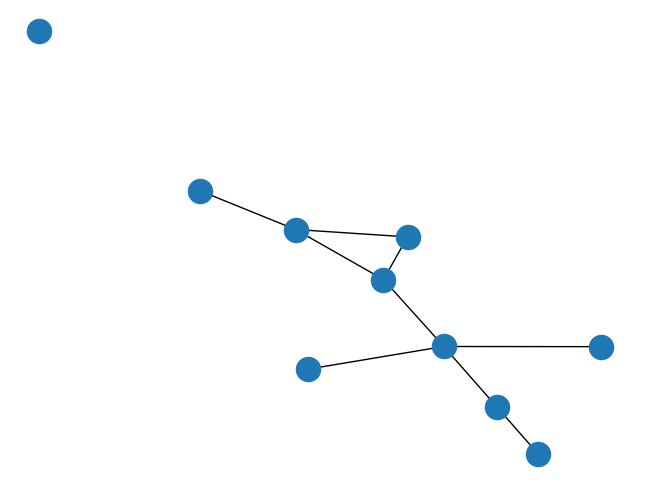

In [85]:
g = nx.gnp_random_graph(10, 0.25)
nx.draw(g)

Una gráfica aleatoria con 10 vértices y 16 aristas.



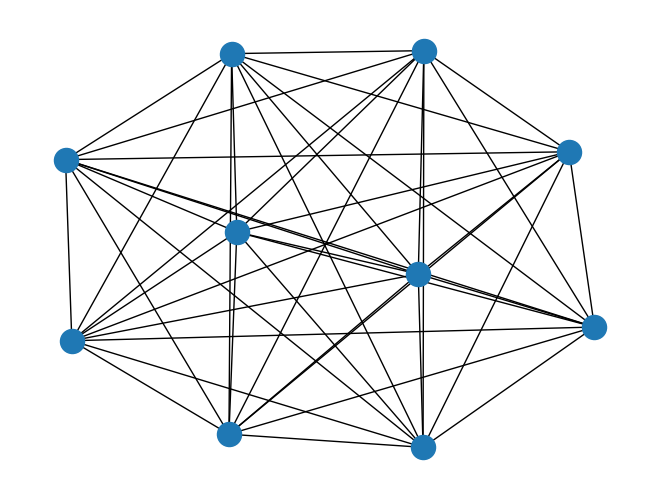

In [97]:
g = nx.gnm_random_graph(10, 10000)
nx.draw(g)

### El atlas de gráficas



La lista de todas las gráficas (salvo isomorfismo) hasta 7 vértices está definida en la función `graph_atlas`. También se puede usar `graph_atlas_g`, que regresa la lista de tales gráficas.



In [91]:
len(nx.graph_atlas_g())

1253

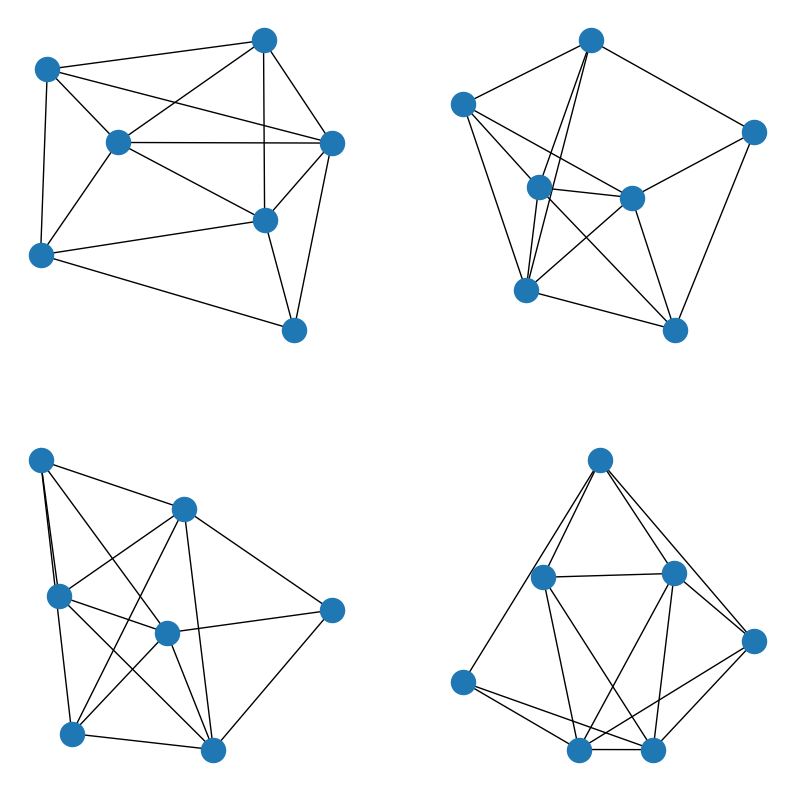

In [92]:
import matplotlib.pyplot as plt
import networkx as nx

i = 1200

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
nx.draw(nx.graph_atlas(i), ax=axs[0, 0])
nx.draw(nx.graph_atlas(i+1), ax=axs[0, 1])
nx.draw(nx.graph_atlas(i+2), ax=axs[1, 0])
nx.draw(nx.graph_atlas(i+3), ax=axs[1, 1])

plt.show()

## Parámetros de una gráfica



El *orden* de una gráfica es la cantidad de vértices que tiene. El *tamaño* es la cantidad de aristas. La *vecindad* de un vértice es el conjunto de sus vecinos. El *grado* de un vértice es la cantidad de vecinos que tiene.



(8, 12, AtlasView({4: {}}), 1)

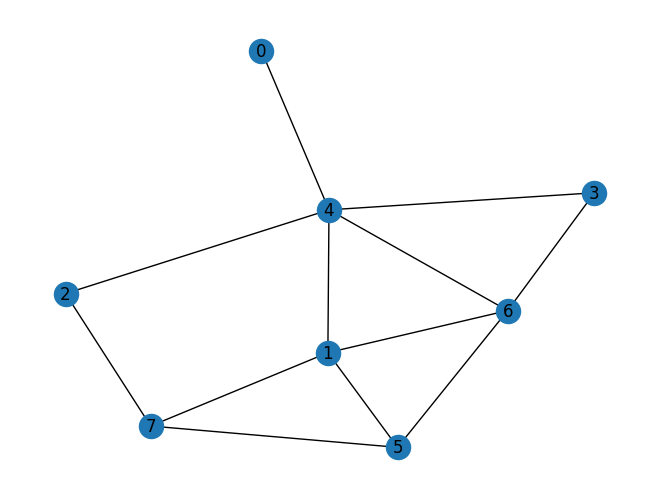

In [102]:
g = nx.gnm_random_graph(8, 12)
nx.draw(g, with_labels=True)
g.order(), g.size(), g[0], g.degree(0)

El g[0] es para ver cuales son amigos del 0

La *distancia* entre dos vértices es la longitud del camino más corto entre los vértices. El *diámetro* de una gráfica $G$ es la distancia más grande posible entre una pareja de vértices de $G$. En `networkx` el diámetro no es un atributo de la gráfica, sino que se calcula con una función.



3

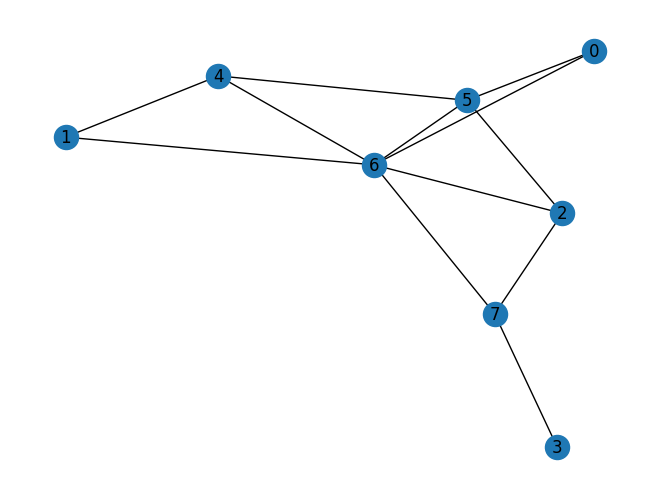

In [111]:
g = nx.gnm_random_graph(8, 12)
nx.draw(g, with_labels=True)
nx.diameter(g)

Una gráfica es *bipartita* si sus vértices se pueden dividir en dos conjuntos, de manera que toda arista une un vértice de un conjunto con un vértice de otro conjunto.



In [104]:
cycle = nx.cycle_graph
nx.is_bipartite(cycle(4)), nx.is_bipartite(cycle(5)), nx.is_bipartite(cycle(6))

(True, False, True)

Una gráfica $G$ es *conexa* si existe un camino en $G$ entre cualesquiera dos vértices. Si una gráfica es conexa y no tiene ciclos, se dice que la gráfica es un *árbol*. Se puede demostrar que un árbol con $n$ vértices tiene necesariamente $n-1$ aristas.



True

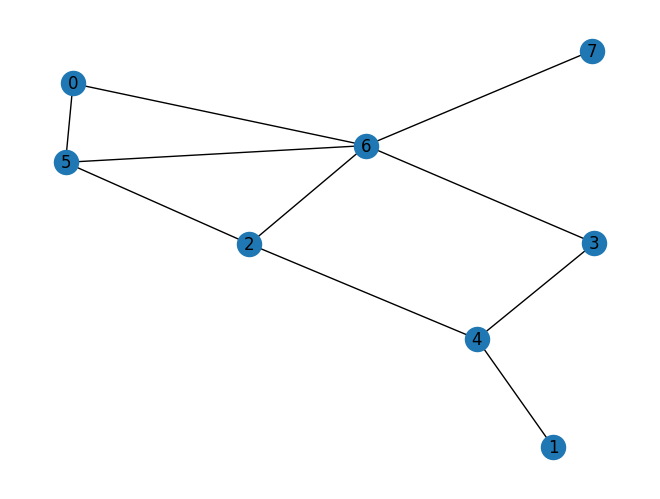

In [118]:
g = nx.gnm_random_graph(8, 10)
nx.draw(g, with_labels=True)
nx.is_connected(g)

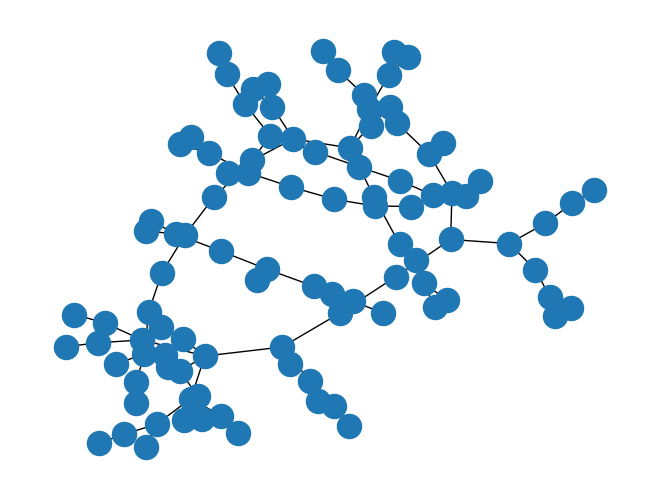

In [125]:
g = nx.random_tree(100)
nx.draw(g)

## Opciones gráficas



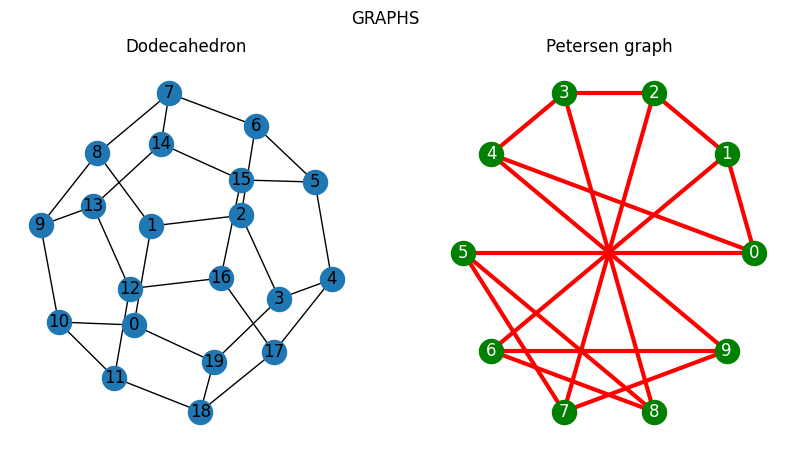

In [126]:
import matplotlib.pyplot as plt
import networkx as nx

g = nx.dodecahedral_graph()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.spring_layout(g)
nx.draw_networkx(g, ax=ax1, pos=pos)
g2 = nx.petersen_graph()
nx.draw_circular(g2, ax=ax2, width=3, edge_color="red", node_color="green", font_color="white", with_labels=True)
ax1.set_title("Dodecahedron")
ax2.set_title("Petersen graph")
fig.suptitle("GRAPHS")
ax1.axis("off")
plt.show()

## TAREA



Determina cuántos árboles hay que tengan cuando mucho 7 vértices. Se puede usar la función `is_tree`.



In [127]:
import networkx as nx
lista = nx.graph_atlas_g()
lista[0].order()

0

In [128]:
nx.is_tree(lista[0])

NetworkXPointlessConcept: ignored

In [129]:
arboles = []

for g in lista:
    try:
        if nx.is_tree(g):
            arboles.append(g)
    except:
        pass

len(arboles)

25

In [130]:
arboles = []

for i, g in enumerate(lista):
    try:
        if nx.is_tree(g):
            arboles.append((i, g))
    except:
        pass

arboles, len(arboles)

([(1, <networkx.classes.graph.Graph at 0x7a20c2f02260>),
  (3, <networkx.classes.graph.Graph at 0x7a20c3298400>),
  (6, <networkx.classes.graph.Graph at 0x7a20ccd1e7d0>),
  (13, <networkx.classes.graph.Graph at 0x7a20ccd1dbd0>),
  (14, <networkx.classes.graph.Graph at 0x7a20ccd1d4b0>),
  (29, <networkx.classes.graph.Graph at 0x7a20ccd1fbe0>),
  (30, <networkx.classes.graph.Graph at 0x7a20ccd1d300>),
  (31, <networkx.classes.graph.Graph at 0x7a20ccd1cbe0>),
  (77, <networkx.classes.graph.Graph at 0x7a20ccc5abf0>),
  (78, <networkx.classes.graph.Graph at 0x7a20ccc5b7c0>),
  (79, <networkx.classes.graph.Graph at 0x7a20ccc58250>),
  (80, <networkx.classes.graph.Graph at 0x7a20ccc59150>),
  (81, <networkx.classes.graph.Graph at 0x7a20ccc59750>),
  (83, <networkx.classes.graph.Graph at 0x7a20ccc5ab60>),
  (270, <networkx.classes.graph.Graph at 0x7a20b99d45e0>),
  (271, <networkx.classes.graph.Graph at 0x7a20b99d4640>),
  (272, <networkx.classes.graph.Graph at 0x7a20b99d46a0>),
  (273, <netwo

In [131]:
arboles = []

for i, g in enumerate(lista[1:]):
    if nx.is_tree(g):
        arboles.append((i, g))

arboles, len(arboles)

([(0, <networkx.classes.graph.Graph at 0x7a20c2f02260>),
  (2, <networkx.classes.graph.Graph at 0x7a20c3298400>),
  (5, <networkx.classes.graph.Graph at 0x7a20ccd1e7d0>),
  (12, <networkx.classes.graph.Graph at 0x7a20ccd1dbd0>),
  (13, <networkx.classes.graph.Graph at 0x7a20ccd1d4b0>),
  (28, <networkx.classes.graph.Graph at 0x7a20ccd1fbe0>),
  (29, <networkx.classes.graph.Graph at 0x7a20ccd1d300>),
  (30, <networkx.classes.graph.Graph at 0x7a20ccd1cbe0>),
  (76, <networkx.classes.graph.Graph at 0x7a20ccc5abf0>),
  (77, <networkx.classes.graph.Graph at 0x7a20ccc5b7c0>),
  (78, <networkx.classes.graph.Graph at 0x7a20ccc58250>),
  (79, <networkx.classes.graph.Graph at 0x7a20ccc59150>),
  (80, <networkx.classes.graph.Graph at 0x7a20ccc59750>),
  (82, <networkx.classes.graph.Graph at 0x7a20ccc5ab60>),
  (269, <networkx.classes.graph.Graph at 0x7a20b99d45e0>),
  (270, <networkx.classes.graph.Graph at 0x7a20b99d4640>),
  (271, <networkx.classes.graph.Graph at 0x7a20b99d46a0>),
  (272, <netwo

In [132]:
arboles = []

for i, g in enumerate(lista):
    if i > 0:
        if nx.is_tree(g):
            arboles.append((i, g))

arboles, len(arboles)

([(1, <networkx.classes.graph.Graph at 0x7a20c2f02260>),
  (3, <networkx.classes.graph.Graph at 0x7a20c3298400>),
  (6, <networkx.classes.graph.Graph at 0x7a20ccd1e7d0>),
  (13, <networkx.classes.graph.Graph at 0x7a20ccd1dbd0>),
  (14, <networkx.classes.graph.Graph at 0x7a20ccd1d4b0>),
  (29, <networkx.classes.graph.Graph at 0x7a20ccd1fbe0>),
  (30, <networkx.classes.graph.Graph at 0x7a20ccd1d300>),
  (31, <networkx.classes.graph.Graph at 0x7a20ccd1cbe0>),
  (77, <networkx.classes.graph.Graph at 0x7a20ccc5abf0>),
  (78, <networkx.classes.graph.Graph at 0x7a20ccc5b7c0>),
  (79, <networkx.classes.graph.Graph at 0x7a20ccc58250>),
  (80, <networkx.classes.graph.Graph at 0x7a20ccc59150>),
  (81, <networkx.classes.graph.Graph at 0x7a20ccc59750>),
  (83, <networkx.classes.graph.Graph at 0x7a20ccc5ab60>),
  (270, <networkx.classes.graph.Graph at 0x7a20b99d45e0>),
  (271, <networkx.classes.graph.Graph at 0x7a20b99d4640>),
  (272, <networkx.classes.graph.Graph at 0x7a20b99d46a0>),
  (273, <netwo

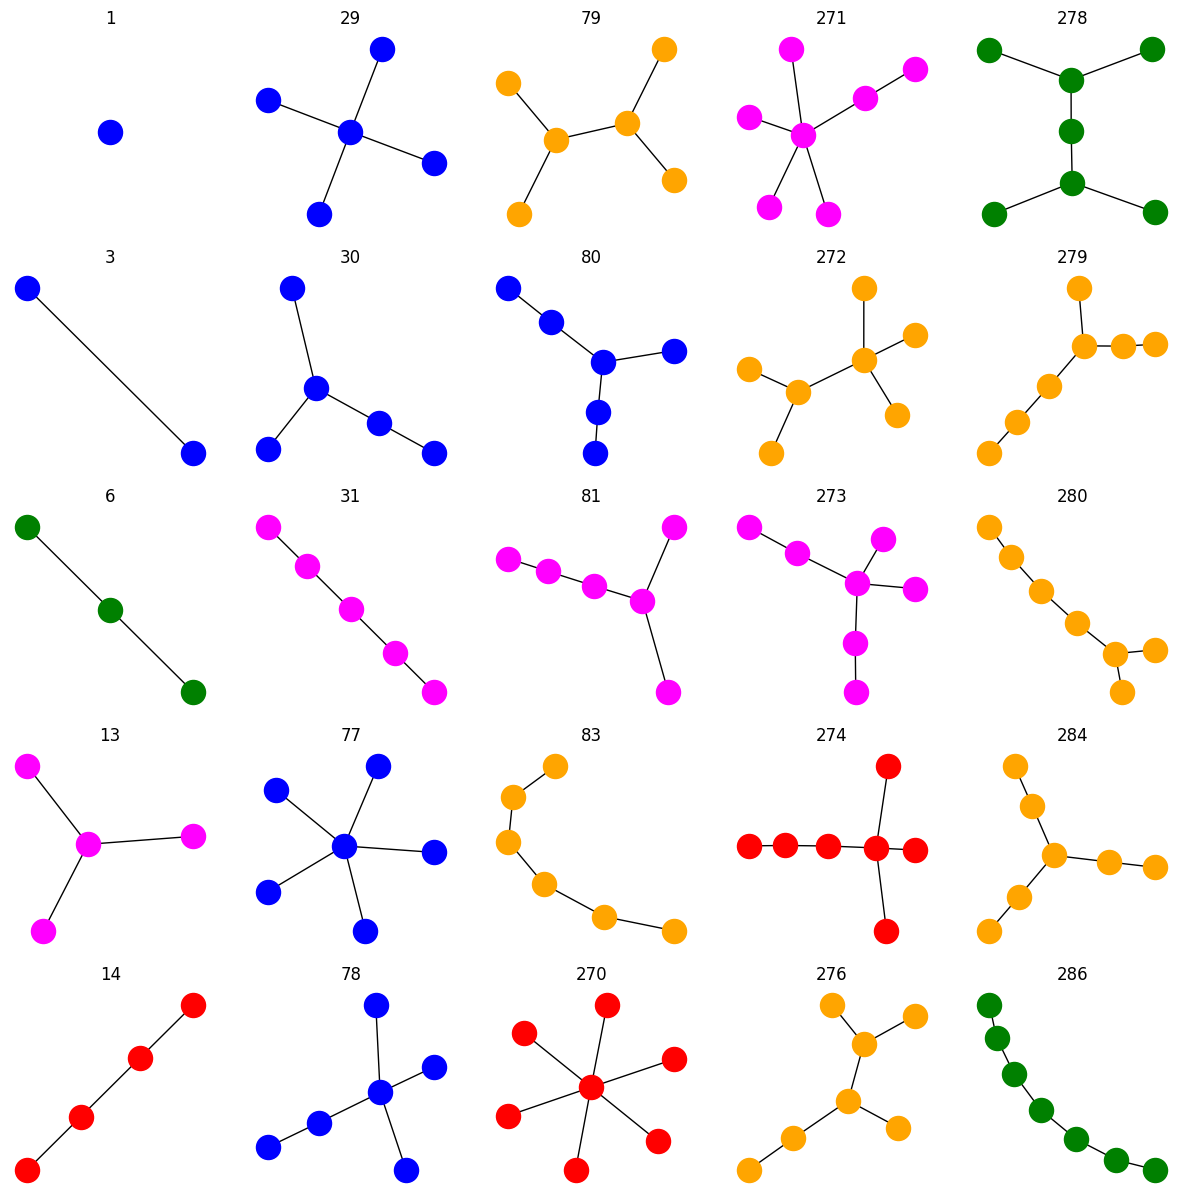

In [133]:
import matplotlib.pyplot as plt
import networkx as nx
import random

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

colores = ["green", "blue", "red", "orange", "magenta"]

for i in range(5):
    for j in range(5):
        indice, arbol = arboles[i+5*j]
        axs[i, j].set_title(indice)
        nx.draw(arbol, ax=axs[i, j], node_color=random.choice(colores))

plt.show()